In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import brian2 as br

In [49]:
br.start_scope()
tau = 10*br.ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

In [50]:
G = br.NeuronGroup(1, eqs, method='exact')

In [51]:
M = br.StateMonitor(G,'v',record=0)

In [52]:
br.run(100*br.ms)

In [53]:
G.v[0]

0.9999546000702376

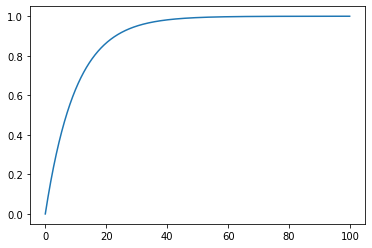

In [54]:
plt.plot(M.t/br.ms, M.v[0])

# Example number 2

In [60]:
br.start_scope()

tau = 10*br.ms
equ='''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau :1
'''

G = br.NeuronGroup(1, equ, method='euler')
M = br.StateMonitor(G,'v', record = 0)
G.v = 5

br.run(100*br.ms)




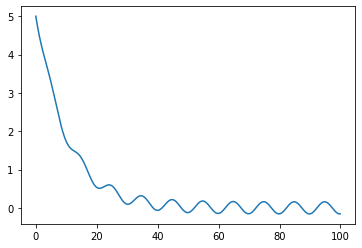

In [62]:
plt.plot(M.t/br.ms, M.v[0])

# Adding spikes

In [73]:
br.start_scope()

tau = 10*br.ms

equ = '''
dv/dt = (1-v)/tau : 1
'''
G = br.NeuronGroup(1, equ, threshold = 'v>0.8', reset='v=0', method = 'exact')

M = br.StateMonitor(G, 'v', record=0)
Sm = br.SpikeMonitor(G)




G.v[0] = 3

br.run(100*br.ms)

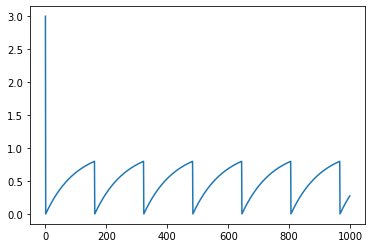

In [72]:
plt.plot(M.v[0])

In [79]:
t = Sm.t/br.ms

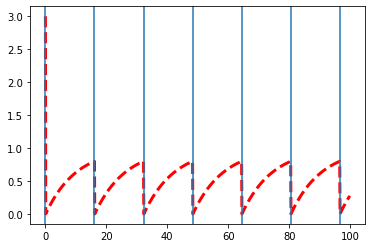

In [104]:
plt.plot(M.t/br.ms, M.v[0],'r--',lw=3)
for elem in Sm.t/br.ms:
    plt.axvline(elem)

## Refractory 

In [137]:
br.start_scope()
tau = 10 * br.ms

equ = '''

dv/dt = (1-v)/tau :1 

'''

G = br.NeuronGroup(1, equ, threshold='v>0.4', reset='v=0', refractory = 15*br.ms, method='exact')

statemon = br.StateMonitor(G, 'v', record = 0)
spilemon = br.SpikeMonitor(G)


br.run (50 * br.ms)

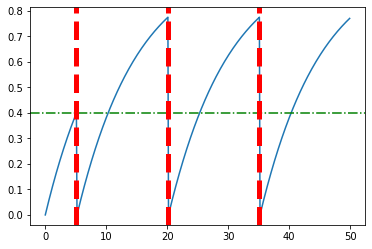

In [140]:
plt.plot(statemon.t/br.ms,statemon.v[0])

plt.axhline(0.4,ls='-.',c='g')
for elem in spilemon.t/br.ms:
    plt.axvline(elem, ls = '--',c = 'red', lw = 5)

# Multiple Neurons

In [162]:
br.start_scope()
N = 100
tau = 10*br.ms
v_inf = 0*br.mvolt

equ = '''
dv/dt = (2-v)/tau : 1

'''


G = br.NeuronGroup(N, equ, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'


spikemon = br.SpikeMonitor(G)

br.run(50*br.ms)

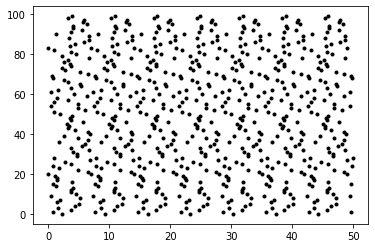

In [163]:
plt.plot(spikemon.t/br.ms, spikemon.i,'.k')

# Raster plot with parameters

In [213]:
br.start_scope()

N = 10
tau = 10*br.ms

v0_max = 3
duration = 1000*br.ms

equ = '''
dv/dt = (v0-v)/tau :1 (unless refractory)
v0 : 1
'''

G = br.NeuronGroup(N, equ, threshold='v>1',
                  reset='v=0', refractory=5*br.ms,
                  method = 'exact')

M = br.SpikeMonitor(G)
S = br.StateMonitor(G,'v', record=[1,2,3,4,5])
G.v0 = 'i*v0_max/(N-1) + rand()'

br.run(duration)

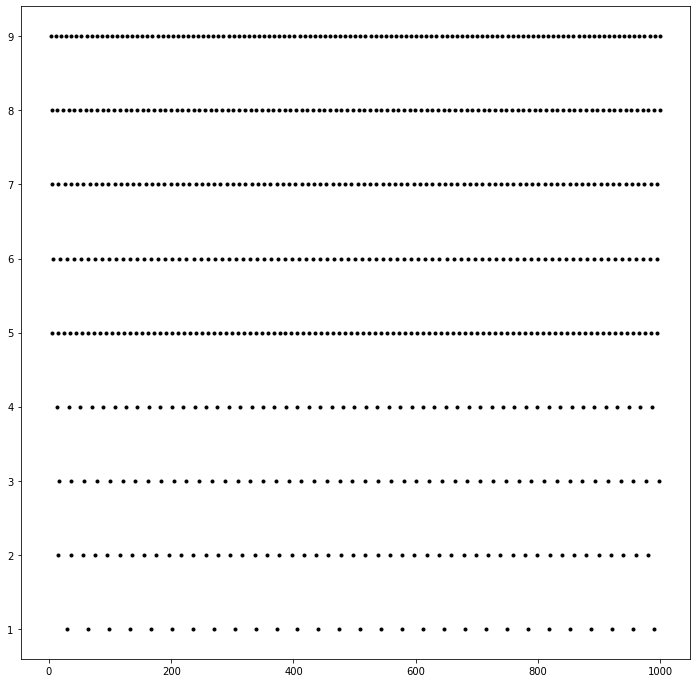

In [214]:
plt.figure(figsize=(12,12))
plt.plot(M.t/br.ms, M.i, '.k')

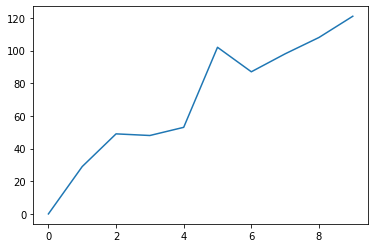

In [215]:
plt.plot(M.count)

## Synapses

In [266]:
br.start_scope()

equ = '''
dv/dt = (I-v)/tau :1
I : 1
tau : second
'''

G = br.NeuronGroup(2, equ, threshold = 'v>0.5',
                  reset = 'v=0', method='exact')

G.I = [2,5]
G.tau = [10,50]*br.ms


statemon = br.StateMonitor(G, 'v', record=True)
spikemon = br.SpikeMonitor(G)

br.run(100*br.ms)

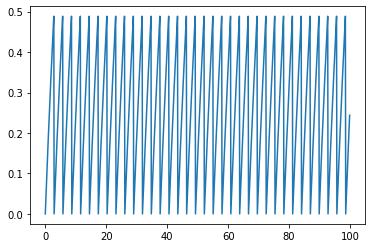

In [267]:
plt.plot(statemon.t/br.ms, statemon.v[0])

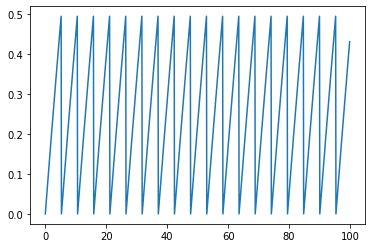

In [268]:
plt.plot(statemon.t/br.ms, statemon.v[1])

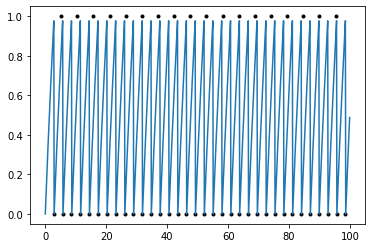

In [277]:
plt.plot(spikemon.t/br.ms, spikemon.i, '.k')
plt.plot(statemon.t/br.ms, 2*statemon.v[0])

In [293]:
spikes_time = spikemon.t / br.ms

In [294]:
spikes = spikemon.i

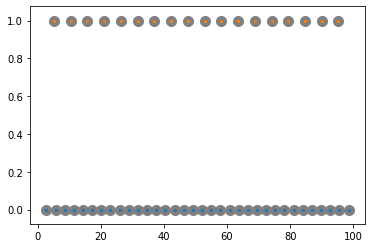

In [321]:
plt.scatter(spikes_time, spikes,c='gray', s=100)
plt.scatter(spikes_time[spikes==0],spikes[spikes==0], s=5)
plt.scatter(spikes_time[spikes==1],spikes[spikes==1], s=5)

In [357]:
br.start_scope()

equ = '''
dv/dt = (I-v)/tau :1
I : 1
tau : second
'''

G = br.NeuronGroup(2, equ, threshold = 'v>1',
                  reset = 'v=0', method='exact')

G.I = [2,0]
G.tau = [10,15]*br.ms


statemon = br.StateMonitor(G, 'v', record=True)
spikemon = br.SpikeMonitor(G)

S = br.Synapses(G, G, on_pre='v_post +=0.5')
S.connect(i=0, j=1)

statemon = br.StateMonitor(G, 'v', record=True)
spikemon = br.SpikeMonitor(G)

br.run(100*br.ms)





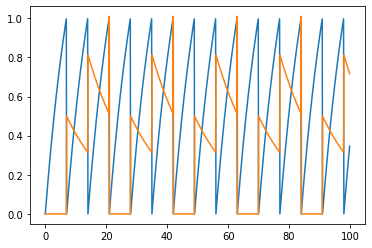

In [358]:
plt.plot(statemon.t/br.ms, statemon.v[0])
plt.plot(statemon.t/br.ms, statemon.v[1])

## Synapse with weights

In [383]:
br.start_scope()

equ = '''
dv/dt = (I-v)/tau :1
I :1
tau : second
'''


G = br.NeuronGroup(3, equ, threshold = 'v>1', 
               reset='v=0', method='exact')
G.I = [2,0,0]
G.tau = [10, 50,50] * br.ms

S = br.Synapses(G,G, 'w:1', on_pre='v_post += w')
S.connect(i=0, j=[1,2])
S.w = 'j*0.1'


statemon = br.StateMonitor(G, 'v', record = True)
spikemon = br.SpikeMonitor(G)





br.run(100*br.ms)

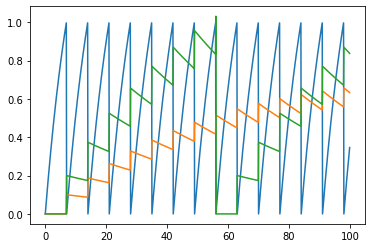

In [384]:
for i in range(3):
    plt.plot(statemon.t/br.ms, statemon.v[i])

## Synapse with delay

In [408]:
br.start_scope()

equ = '''
dv/dt = (I-v)/tau : 1
I:1
tau:second
'''


#### Defining the neurons model ####

G = br.NeuronGroup(3, equ, threshold = 'v>0.5',
                  reset = 'v = 0', method = 'exact')

G.v = [0,0,0]
G.tau = [20,20,30] * br.ms
G.I = [1,0,0]

#### Creating the synapses ####

S = br.Synapses(G, G, 'w:1', on_pre='v_post += w')
S.connect(i=0, j=[1,2])
S.w = 'j*0.2'
S.delay = 'j*2*ms'

statemon = br.StateMonitor(G, 'v', record=True)
spikemon = br.SpikeMonitor(G)

br.run(100*br.ms)

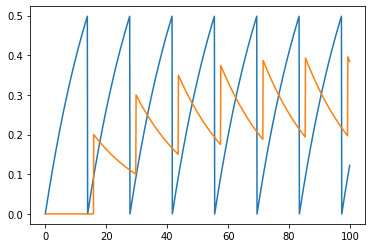

In [409]:
for i in range(2):
    #plt.figure(figsize=(12,5))
    plt.plot(statemon.t/br.ms, statemon.v[i])

## More Complex connectivities

In [436]:
def visualize(S):
    Ns = len(S.source)
    Nt=  len(S.target)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(np.zeros(Ns), np.arange(Ns), 'ok', ms=10)
    plt.plot(np.ones(Ns), np.arange(Ns), 'ok', ms=10)
    for elem in zip(S.i, S.j):
        plt.plot([0,1],elem,'k')
    plt.subplot(122)
    plt.plot(S.i, S.j, 'ok')

In [442]:
br.start_scope()

N = 10
G = br.NeuronGroup(N, 'v:1')
S = br.Synapses(G,G)
#S.connect(condition='abs(i-j)<4 and i!=j', p=0.8)
S.connect(j='i')

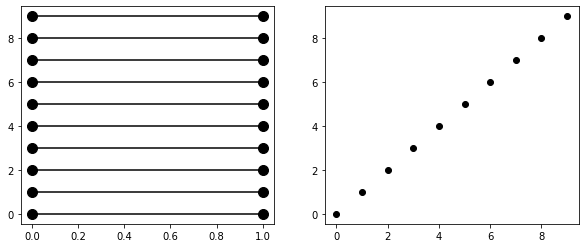

In [443]:
visualize(S)

## Synapse Plastisity

In [455]:
br.start_scope()

taupre = taupost = 20*br.ms
wmaxs = 0.01
A_pre = 0.01
A_post = -A_pre*tau_pre/tau_post*1.05
equ = '''v:1'''

G = br.NeuronGroup(1, 'v:1', threshold='v>1')

w_equ = '''
w : 1
dapre/dt = -apre/taupre :1(event-driven)
dapost/dt = -apost/taupost :1(event-driven)
'''
pre_update ='''
apre = aper + Apre
w = w + a_post
'''
post_update = '''
apost = apost + Apost
w = w + apre
'''
S = br.Synapses(G,G,w_equ, on_pre = pre_update,
               on_post = post_update)
